# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [19]:
print(cities)

['tuktoyaktuk', 'waimana', 'menongue', 'rikitea', 'lebu', 'aksarka', 'alice springs', 'hermanus', 'salalah', 'saskylakh', 'airai', 'atuona', 'los llanos de aridane', 'caravelas', 'grand river south east', 'khatanga', 'agadez', 'albany', 'bluff', 'deputatskiy', 'punta arenas', 'busselton', 'kaka', 'the hague', 'karaul', 'beringovskiy', 'strezhevoy', 'bredasdorp', 'jamestown', 'victoria', 'kodiak', 'caska', 'oudtshoorn', 'douentza', 'chokurdakh', 'tiksi', 'juneau', 'canto do buriti', 'georgetown', 'turbat', 'leningradskiy', 'thompson', 'mataura', 'hobart', 'sanjwal', 'inirida', 'komsomolskiy', 'codrington', 'formoso do araguaia', 'tynda', 'new norfolk', 'lagoa', 'ushuaia', 'puerto ayora', 'east london', 'artyom', 'barrow', 'pevek', 'nagato', 'vaini', 'illoqqortoormiut', 'chapais', 'phuket', 'praia', 'cherskiy', 'antofagasta', 'goderich', 'butaritari', 'san jose', 'dingle', 'cervia', 'lorengau', 'kaitangata', 'muisne', 'cape town', 'torbay', 'griffith', 'maraa', 'bandarbeyla', 'kuldur', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 59.7, 'lon': 30.79},
 'dt': 1582162314,
 'id': 546105,
 'main': {'feels_like': 30.09,
          'humidity': 96,
          'pressure': 1005,
          'temp': 35.76,
          'temp_max': 36,
          'temp_min': 35.6},
 'name': 'Nikolskoye',
 'sys': {'country': 'RU',
         'id': 8926,
         'sunrise': 1582176150,
         'sunset': 1582210747,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 4.47}}


In [7]:
response['coord']['lon']

30.79

In [3]:
# Start Building URL.
#source refernce
#https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


Cities = []
Lats = []
Lons = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Max_Temp = []
Wind = []

# Add to the query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#loop through sets of 50
set_size = 50
i=1

set_counter = 1

print('Beginning Data Retrieval')    
print('-----------------------------')
#loop through the cities
for city in cities:
    response=requests.get(query_url+city).json()
    try:
        if i > set_size:
            # Wait for 30 seconds so we don't lock our API Key due to overuse
            time.sleep(30)
            i=1
            set_counter += 1    
        print('Processing Record '+str(i)+' of Set '+str(set_counter)+' | '+city)
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Max_Temp.append(response['main']['temp_max'])
        Wind.append(response['wind']['speed'])
        Cities.append(city)
        Lats.append(response['coord']['lat'])
        Lons.append(response['coord']['lon'])
        i+=1

    except:
        print('City not found. Skipping...')
print('-----------------------------')
print('Data Retrieval Complete ')    
print('-----------------------------')    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | songea
Processing Record 2 of Set 1 | hambantota
Processing Record 3 of Set 1 | karamken
City not found. Skipping...
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | muli
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | bilma
Processing Record 7 of Set 1 | lahij
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | santiago de cao
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | ornskoldsvik
Processing Record 14 of Set 1 | roma
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | kedrovyy
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | cascais
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of

Processing Record 20 of Set 4 | manaus
Processing Record 21 of Set 4 | santa cruz del sur
Processing Record 22 of Set 4 | sobolevo
Processing Record 23 of Set 4 | vacaria
Processing Record 24 of Set 4 | nedjo
Processing Record 25 of Set 4 | sabang
Processing Record 26 of Set 4 | samusu
City not found. Skipping...
Processing Record 26 of Set 4 | mumford
Processing Record 27 of Set 4 | sistranda
Processing Record 28 of Set 4 | lloydminster
Processing Record 29 of Set 4 | luanda
Processing Record 30 of Set 4 | prince rupert
Processing Record 31 of Set 4 | mogwase
Processing Record 32 of Set 4 | kavaratti
Processing Record 33 of Set 4 | nara
Processing Record 34 of Set 4 | havoysund
Processing Record 35 of Set 4 | fortuna
Processing Record 36 of Set 4 | waitati
Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 39 of Set 4 | tiarei
Processing Record 40 of Set 4 | sars
Process

Processing Record 47 of Set 7 | raudeberg
Processing Record 48 of Set 7 | port-gentil
Processing Record 49 of Set 7 | atasu
Processing Record 50 of Set 7 | gelemso
Processing Record 1 of Set 8 | colac
Processing Record 2 of Set 8 | mongo
Processing Record 3 of Set 8 | wampusirpi
City not found. Skipping...
Processing Record 3 of Set 8 | coquimbo
Processing Record 4 of Set 8 | presidencia roque saenz pena
Processing Record 5 of Set 8 | senekal
Processing Record 6 of Set 8 | quang ngai
Processing Record 7 of Set 8 | ballina
Processing Record 8 of Set 8 | wick
Processing Record 9 of Set 8 | qui nhon
Processing Record 10 of Set 8 | lakes entrance
Processing Record 11 of Set 8 | hirara
Processing Record 12 of Set 8 | vaitape
Processing Record 13 of Set 8 | iqaluit
Processing Record 14 of Set 8 | pokhara
Processing Record 15 of Set 8 | burgersdorp
Processing Record 16 of Set 8 | sitka
Processing Record 17 of Set 8 | asfi
Processing Record 18 of Set 8 | muros
Processing Record 19 of Set 8 | a

Processing Record 24 of Set 11 | bloemhof
Processing Record 25 of Set 11 | issia
Processing Record 26 of Set 11 | aleksandrov gay
Processing Record 27 of Set 11 | zhelyabovka
Processing Record 28 of Set 11 | arkhangelsk
Processing Record 29 of Set 11 | filingue
Processing Record 30 of Set 11 | takoradi
Processing Record 31 of Set 11 | portsoy
Processing Record 32 of Set 11 | lalomanu
City not found. Skipping...
Processing Record 32 of Set 11 | mercedes
Processing Record 33 of Set 11 | athabasca
Processing Record 34 of Set 11 | amga
Processing Record 35 of Set 11 | syracuse
Processing Record 36 of Set 11 | pianco
Processing Record 37 of Set 11 | liusha
Processing Record 38 of Set 11 | charagua
Processing Record 39 of Set 11 | uk
City not found. Skipping...
Processing Record 39 of Set 11 | xinyu
Processing Record 40 of Set 11 | tondi
Processing Record 41 of Set 11 | utiroa
City not found. Skipping...
Processing Record 41 of Set 11 | tigil
Processing Record 42 of Set 11 | veraval
Processi

In [4]:
#load the data into a dataframe for plotting
weather_dict = {
    'City': Cities,
    'Cloudiness': Cloudiness,
    'Country': Country,
    'Date':Date,
    'Humidity':Humidity,
    'Lat':Lats,
    'Lon':Lons,
    'Max Temp':Max_Temp,
    'Wind Speed':Wind
}
weather_data = pd.DataFrame(weather_dict)



In [5]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,songea,20,TZ,1582162905,94,-10.68,35.65,69.80,2.24
1,hambantota,0,LK,1582162695,100,6.12,81.12,73.40,1.12
2,saskylakh,0,RU,1582162905,97,71.92,114.08,-8.79,5.61
3,muli,6,MV,1582162905,78,2.92,73.57,81.36,15.93
4,necochea,35,AR,1582162057,64,-38.55,-58.74,60.01,13.00


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Export the city weather data to csv
weather_data.to_csv(output_data_file, index = None, header=True)

In [7]:
#Get a count of the city weather data
weather_data.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lon           562
Max Temp      562
Wind Speed    562
dtype: int64

In [8]:
#Preview the city weather data
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,songea,20,TZ,1582162905,94,-10.68,35.65,69.80,2.24
1,hambantota,0,LK,1582162695,100,6.12,81.12,73.40,1.12
2,saskylakh,0,RU,1582162905,97,71.92,114.08,-8.79,5.61
3,muli,6,MV,1582162905,78,2.92,73.57,81.36,15.93
4,necochea,35,AR,1582162057,64,-38.55,-58.74,60.01,13.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
#source reference:
#https://www.w3schools.com/python/python_datetime.asp
today = datetime.datetime.now().strftime("%m/%d/%Y")

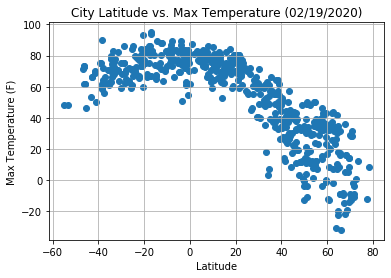

In [10]:
x_data = weather_data['Lat']
y_data = weather_data['Max Temp']
plt.scatter(x_data,y_data)
plt.title('City Latitude vs. Max Temperature ('+today+')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('../Images/plot_lat_vs_max_temp.png')
plt.show()

#### Observation - the max temperature increases approaching the equator and is generally lower in the northern hemisphere

#### Latitude vs. Humidity Plot

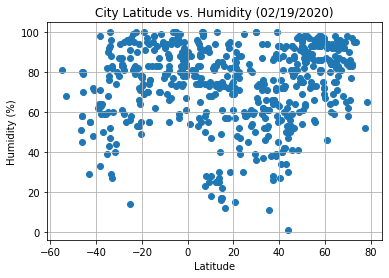

In [11]:
x_data = weather_data['Lat']
y_data = weather_data['Humidity']
plt.scatter(x_data,y_data)
plt.title('City Latitude vs. Humidity ('+today+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('../Images/plot_lat_vs_humidity.png')
plt.show()

#### Observation - the humidity is generally above 60% between -40 and 75 latitude but reduces outside that range

#### Latitude vs. Cloudiness Plot

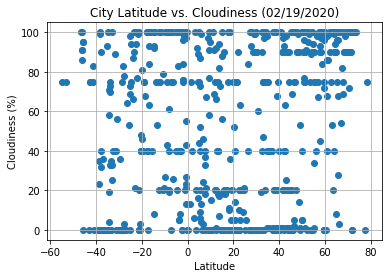

In [14]:
x_data = weather_data['Lat']
y_data = weather_data['Cloudiness']
plt.scatter(x_data,y_data)
plt.title('City Latitude vs. Cloudiness ('+today+')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('../Images/plot_lat_vs_cloudiness.png')
plt.show()

#### Observation - the cloudiness is generally similar regardless of latitude

#### Latitude vs. Wind Speed Plot

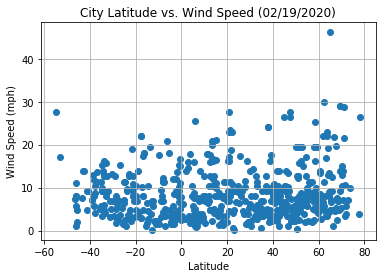

In [13]:
x_data = weather_data['Lat']
y_data = weather_data['Wind Speed']
plt.scatter(x_data,y_data)
plt.title('City Latitude vs. Wind Speed ('+today+')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('../Images/plot_lat_vs_wind.png')
plt.show()

#### Observation - the wind is generally below 20 mph however can increase as latitude increases